In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from PIL import Image
import io
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from dataset import ArcShapesDataset

In [5]:
# Load CSV data
df = pd.read_csv('problems/problems/frag0.csv', header = None)

arc_points = {}
for arc_number in df[0].unique():
    points = df[df[0] == arc_number][[2, 3]].values
    arc_points[arc_number] = points


# Generate all possible combinations of arcs and plot them
def plot_arcs(arcs):
    plt.figure()
    for arc in arcs:
        points = arc_points[arc]
        plt.plot(points[:, 0], points[:, 1])
    plt.axis('off')
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    return Image.open(buf)

In [3]:
# ArcShapesDataset
# plot_arcs

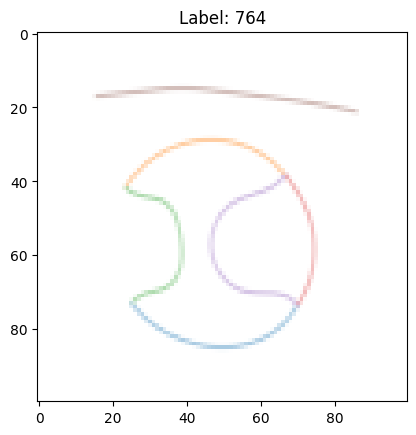

In [4]:
arc_numbers = list(arc_points.keys())
all_combinations = []
for r in range(1, len(arc_numbers) + 1):
    all_combinations.extend(combinations(arc_numbers, r))

# Create dataset
dataset = ArcShapesDataset(all_combinations)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

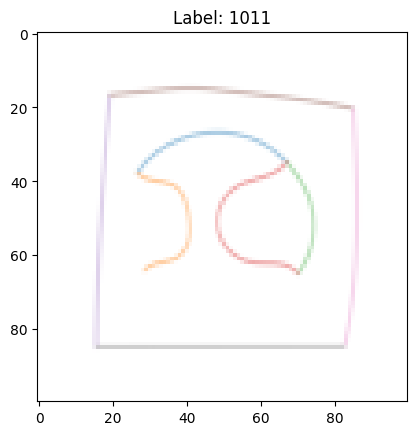

In [6]:
# Example: Retrieve one batch and display
for images, labels in dataloader:
    plt.imshow(images[0].permute(1, 2, 0))
    plt.title(f'Label: {labels.item()}')
    plt.show()
    break